# Research Discontinuity Designs (in R)

This is a jupyter notebook with an R kernel running in the background to execute R code.

Content below draws on  

- Cattaneo, Idrobo and Titiunik (2008) "A Practical Introduction to Regression Discontinuity Designs: Part I," in Cambridge Elements: Quantitative and Computational Methods for Social Science, Cambridge University Press. See also "Part II" paper.


- Meyersson (2014): [Islamic Rule and the Empowerment of the Poor and Pious](https://doi.org/10.3982/ecta9878), *Econometrica* 82(1): 229-269.

Links to these papers and data and Stata and R code for replication at [RD Software Packages site](https://sites.google.com/site/rdpackages/replication/cit-2018-cambridge).

### Sharp RD

Assignment to treatment status is a deterministic and discontinuous function of a covariate (running variable or forcing variable) $X_i$. 

$$
D_i= \left\{
\begin{array}{@{}ll@{}}
    1 & \text{if}\ X_i\ge X_0 \\
    0 & \text{if}\ X_i \lt X_0 
 \end{array}
 \right.
$$

where $X_0$ is a threshold or cutoff. 

**Example:** National Merit scholarship awarded to all students with PSAT score above some threshold. 


![sharpRD](images/sharpRD.PNG)

$Y_i(1)$ and $Y_i(0)$ are potential outcomes observed under treatment or control, respectively. $E[Y_i(1)|X_i]$ observed only to right of cutoff. $E[Y_i(0)|X_i]$ only to left. 

Treatment effect estimated as 

$$
\tau_{SRD}=E[Y_i(1)-Y_i(0)|X_i=X_0]
$$

Local treatment effect at/near the cutoff.  In practice SRD estimate estimated as difference between weighted average of outcomes on the either side of the discontinuity. 

![sharpRD2](images/sharpRD2.PNG)

Conditional independence:

$$E[Y_i(0) |X_i , D_i ] = E[Y_i(0) |X_i ]$$

once we control for cofounder $X_i$, treatment assignment as good as random.

For observations very close to the discontinuity we effectively have an experiment.


![rdd1](images/rdd1.PNG)

Non-linearity must not be mistaken for a discontinuity.  In this example with linear fits on each side, estimate a positive 'treatment' effect. More likely relationship is non-linear with zero treatment effect.

![Non Linear relationship](images/rd_nonlin.png)



### Meyersson (2014) 
### Identifying impacts of municipal election victories by Islamic political parties on educational attainment of women

$X$   -  *running variable* 

$Y$   -  *outcome* women's high-school completion rate

$T$   -  *treatment* Islamic party comes to power in municipal government


In [41]:
#control the size of R plots in jupyter
options(repr.plot.width=5, repr.plot.height=5)

In [42]:
# Load R libraries
library(foreign)
library(ggplot2)
library(lpdensity)
library(rddensity)
library(rdrobust)
library(rdlocrand)
library(TeachingDemos)

## R Code

In [43]:
data = read.dta("CIT_2018_Cambridge_polecon.dta")

In [44]:
Y = data$Y
X = data$X
T = data$T
T_X = T*X

**Raw Comparison of means**  (Figure 2.3a)

If we simply compare outcomes in treated (Islamic major) and non-treated areas (secular major), we find lower female educational attainment in areas where Islamic parties won.

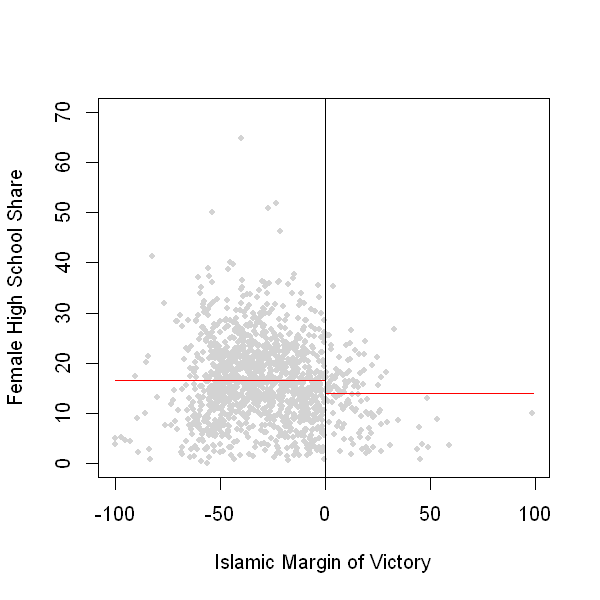

In [45]:
rdplot(Y, X, nbins = c(2500, 500), p = 0, col.lines = "red", col.dots = "lightgray", title = "", 
       x.label = "Islamic Margin of Victory", y.label = "Female High School Share", y.lim = c(0,70))

#### Local comparison of means: Narrowing the bandwidth


In last plot we compared mean value in treated and control group.  But these two groups differ considerably.

Below we focus on more 'local' effects (closer to just above and below the cutoff).  

In next plot we fit a 4th degree polynomial on each side but now limit bandwidth to 'closer' contests where absolute victory margin was within 50 points.

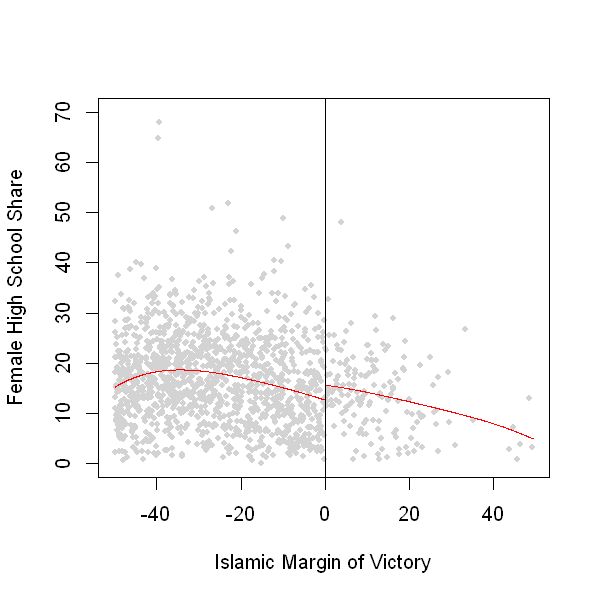

In [46]:
rdplot(Y[abs(X) <= 50], X[abs(X) <= 50], nbins = c(2500, 500), p = 4, col.lines = "red", 
       col.dots = "lightgray", title = "",  x.label = "Islamic Margin of Victory", 
       y.label = "Female High School Share", y.lim = c(0,70))

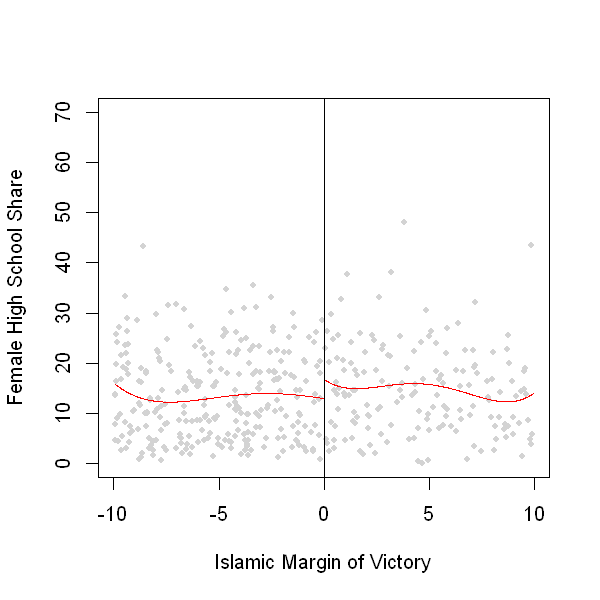

In [47]:
rdplot(Y[abs(X) <= 10], X[abs(X) <= 10], nbins = c(2500, 500), p = 4, col.lines = "red", col.dots = "lightgray", title = "", 
       x.label = "Islamic Margin of Victory", y.label = "Female High School Share", y.lim = c(0,70))

![Meyersson ](images/Meyersson1.PNG)

## RD plots

- scatter plots (as above) make it hard to discern 'jumps'

- RD plots aggregate or 'smooth' data before plotting. 

    - local sample means (from bins) represented by dots
    
    - polynomial (or local linear) fits
    
Plenty of variation in bin and bandwidth selection and curve fitting based on these concepts.

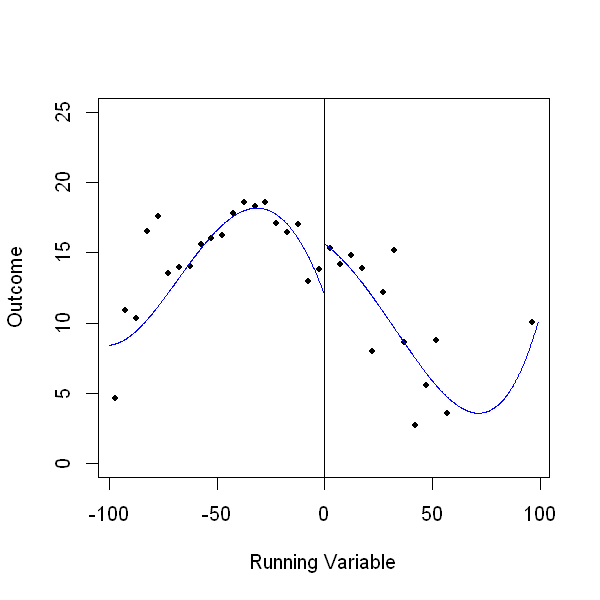

In [48]:
rdplot(Y, X, nbins = c(20,20), binselect = 'esmv', x.label = 'Running Variable', y.label = 'Outcome', 
       title = '', y.lim = c(0,25))

The estimating equation:

$$ Y_i(0) = f(X_i) + \epsilon _i $$

$$Y_i(1) = Y_i(0) + \beta$$

All in one:
$$
Y_i = f(X_i) +\beta D_i + \epsilon_i
$$

The function $f(X_i)$ (e.g. a polynomial) must be continuous at $X_0$ 

The RD estimate is difference between weighted average of outcomes on the either side of the discontinuity. Fitting a high order polynomial can mean these weighted averages are driven by observations far from the threshold.

Parametric (polynomial on full data) or non-parametric (local regression closer to cutoff) approaches?

Andrew Gelman's [blog post from 8/13](http://andrewgelman.com/2013/08/05/evidence-on-the-impact-of-sustained-use-of-polynomial-regression-on-causal-inference-a-claim-that-coal-heating-is-reducing-lifespan-by-5-years-for-half-a-billion-people/) discusses this issue.  See also [Development Impact Blog](https://blogs.worldbank.org/impactevaluations/curves-all-wrong-places-gelman-and-imbens-why-not-use-higher-order-polynomials-rd)

Chen et al (2013) "Evidence on the impact of sustained exposure to air pollution on life expectancy from China’s Huai River policy,” *PNAS*. 

**Policy discontinuity**:  North of China's Huai river free coal for heating is distributed in winter. None ti the south. Using RDD method find total suspended particulates (TSPs) air pollution 55% higher just North of river compared to just south. Estimates China’s coal-burning was reducing lifespan by 5 years for half a billion people. 


![](images/ChinaRDD.png)

Are observations far from threshold affecting polynomial fit, driving results? Smaller estimates with linear fits?

![](images/ChinaRDD2.PNG)

## Fuzzy RD
![](images/fuzzy.PNG)

A fuzzy RD is like an RD with imperfect compliance or non-compliance.  Assignment to Treatment is as before summarized by indicator $I({X_i \ge X_0})$ but compliance is now imperfect.  Like an Intent-to-Treat (ITT) estimator, the measured jump at the cutoff in the outcome needs to be rescaled.

Structural equation:  $Y_i = f(X_i)+\beta D_i +\epsilon_i$

@nd stage reduced form: $Y_i = f(X_i)+\pi_2 I({X_i \ge X_0} +\xi_{2i}$

First stage: $D_i = g(X_i)+\pi_1 I({X_i \ge X_0} +\xi_{1i}$

Standard IV: $ \beta=\frac{\pi_2}{\pi_1} $

## Multi-Score RD design

Example: Third graders have to go to summer school if score below $X_{10}$ in reading test OR below $X_{20}$ in math test. Does summer school raise test performance next year?

![](images/RDD_2force.PNG)
From [Zamosc 2012](http://nrs.harvard.edu/urn-3:HUL.InstRepos:9368030)

### Polynomial Fit in 2 dimensions

![2d polyfit](images/RDD_2force2.PNG)

With two forcing variables 
- The cutoff is now a boundary
- Heterogenous effects, depending on what segment of the boundary
- with right assumptions (lots of data), can identify one treatment effect for every point b on boundary. Treatment effect curve $\tau(b)$
- Average Treatment Effect (ATE) would average over boundary

## Geographic RD designs 

- Latitude, Longitude forcing variables. Collapse to one-dimensional distance (e.g. 'distance to border') problematic.

![](images/2d_distance.PNG)
Keele & Titiunik (2014)

## Application:

### Dell (2010) Persistent Effects of Peru's Mining *Mita*

Dell, Melissa. 2010. “The Persistent Effects of Peru’s Mining ‘Mita.’” *Econometrica* 78 (6): 1863–1903.

Continue to slide notes.
